## Observations and Insights 

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()

## Observations and Insights 
#The two files merged together nicely and with out column repeats. Can make Mouse ID the idnex to 
#better view and sort data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [26]:
# Checking the number of mice.
num_mice1 = combined_mouse_data["Mouse ID"].value_counts()
total_mice1 = len(num_mice1)
print(f"Total number of unique mice: {total_mice1}")

total_entries1 = combined_mouse_data["Mouse ID"].count()
total_entries1
print(f"Total number of unique data entries: {total_entries1}")

Total number of unique mice: 249
Total number of unique data entries: 1893


In [27]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_data_info = combined_mouse_data.loc[combined_mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_mouse_info = pd.DataFrame(duplicated_data_info)
duplicated_mouse_info



,0
0,g989


In [28]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_mouse_data_altered_index = combined_mouse_data.copy()
combined_mouse_data_altered_index = combined_mouse_data_altered_index.set_index("Mouse ID")
all_duplicate_data = combined_mouse_data_altered_index.loc[['g989']]
all_duplicate_data


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [29]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#cleaned_mouse_data = combined_mouse_data.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
cleaned_mouse_data = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(duplicated_data_info) == False]
cleaned_mouse_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice in the clean DataFrame.

num_mice2 = cleaned_mouse_data["Mouse ID"].value_counts()
total_mice2 = len(num_mice2)
print(f"Total number of unique mice: {total_mice2}")

total_entries2 = cleaned_mouse_data["Mouse ID"].count()
total_entries2
print(f"Total number of unique data entries: {total_entries2}")

Total number of unique mice: 248
Total number of unique data entries: 1880


## Summary Statistics

In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_df = cleaned_mouse_data.groupby("Drug Regimen")
summary_df = summary_df["Tumor Volume (mm3)"]

summary_mean = summary_df.mean().round(3)
summary_median = summary_df.median().round(3)
summary_variance = summary_df.var().round(3)
summary_std = summary_df.std().round(3)
summary_sem = summary_df.sem().round(3)

summary_stats_df = pd.DataFrame({"Average": summary_mean,
                                "Median": summary_median,
                                 "Variance": summary_variance,
                                "Standard Deviation": summary_std,
                                "SEM": summary_sem}) 

summary_stats_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_stats2_df = (cleaned_mouse_data.groupby(['Drug Regimen'])["Tumor Volume (mm3)"]
                 .agg([('Average','mean'),('Median','median'),('Variance', 'var'), 
                       ('Standard Deviation', 'std'), ('SEM', 'sem')])).round(3)
summary_stats2_df

,Average,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

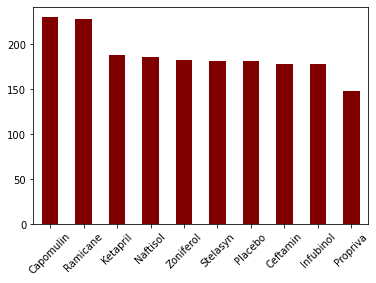

In [33]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

cleaned_mouse_data["Drug Regimen"].value_counts().plot(kind='bar',rot=45, color='maroon')
plt.show()

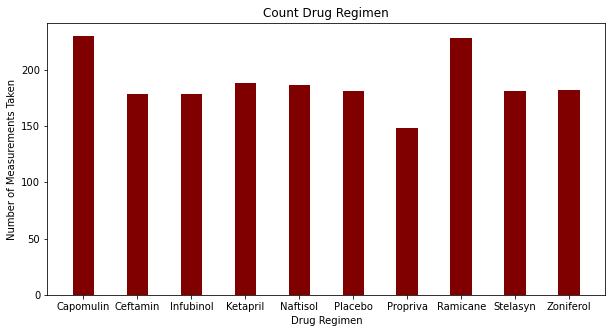

In [34]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

summary_stats3_df = (cleaned_mouse_data.groupby(['Drug Regimen'])["Mouse ID"]
                 .agg([('Total','count')])).reset_index()

drug_regimen = summary_stats3_df['Drug Regimen'] 
measurements_taken = summary_stats3_df['Total'] 
   
fig = plt.figure(figsize = (10, 5)) 
  
plt.bar(drug_regimen, measurements_taken, color ='maroon', width = 0.4) 
  
plt.xlabel("Drug Regimen") 
plt.ylabel("Number of Measurements Taken") 
plt.title("Count Drug Regimen") 
plt.show() 

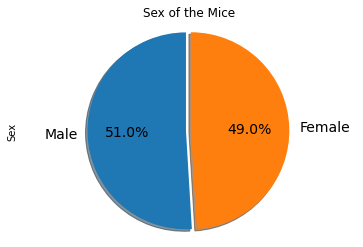

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

cleaned_mouse_data["Sex"].value_counts().plot(kind='pie',startangle=90,
    autopct='%1.1f%%', shadow=True, legend = False, fontsize=14, explode=(0,.05), title = "Sex of the Mice")

plt.axis('equal')
plt.show()

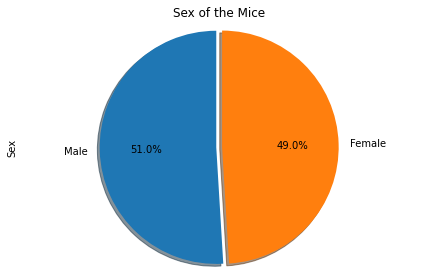

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

counts = cleaned_mouse_data['Sex'].value_counts()
    
plt.pie(counts.values , labels=counts.index.values, 
       shadow=True, explode=(0,0.05), startangle=90, autopct='%1.1f%%')

plt.ylabel("Sex")
plt.title("Sex of the Mice")
plt.axis('equal')
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

specific_drug_df = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"] == "Capomulin") |
                                          (cleaned_mouse_data["Drug Regimen"] == "Ramicane") |
                                          (cleaned_mouse_data["Drug Regimen"] == "Infubinol") | 
                                          (cleaned_mouse_data["Drug Regimen"] == "Ceftamin")]

specific_drug_df = specific_drug_df[specific_drug_df['Timepoint'] == 
                                      specific_drug_df['Timepoint'].max()]

specific_drug_df = specific_drug_df.set_index("Drug Regimen").sort_index()

specific_drug_df                                        

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,v923,Female,19,21,45,40.658124,2
Capomulin,r944,Male,12,25,45,41.581521,2
Capomulin,l509,Male,17,21,45,41.483008,3
Capomulin,s710,Female,1,23,45,40.728578,1
Capomulin,g316,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...
Ramicane,e662,Male,8,24,45,40.659006,2
Ramicane,u196,Male,18,25,45,40.667713,3
Ramicane,q597,Male,20,25,45,45.220869,2


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
#Treatments as in Drug Regiements (the 4 above?? or all...)

# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
    
    
#4loop attempt    
#specific_drug_df = specific_drug_df.reset_index(drop=True)      

#treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#tumor_vol_data = []

#for drug in treatment_list:
#    final_tumor_numbers = specific_drug_df.loc[specific_drug_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
#    tumor_vol_data.append[final_tumor_numbers]



final_tumor_numbers = specific_drug_df["Tumor Volume (mm3)"]

quartiles = final_tumor_numbers.quantile([0.25,0.5,0.75])
lowerq = (quartiles[0.25])
upperq = (quartiles[0.75])
iqr = (upperq - lowerq)


print(f"The lower quartile of tumor volume (mm3) is: {lowerq}")
print(f"The upper quartile of tumor volume (mm3) is: {upperq}")
print(f"The interquartile range of tumor volume (mm3) is: {iqr}")
print(f"The the median of tumor volume (mm3) is: {quartiles[0.5]} ")

lower_bound = (lowerq - (1.5*iqr)).round(3)
upper_bound = (upperq + (1.5*iqr)).round(3)
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

The lower quartile of tumor volume (mm3) is: 33.48002734
The upper quartile of tumor volume (mm3) is: 62.14221369
The interquartile range of tumor volume (mm3) is: 28.66218635
The the median of tumor volume (mm3) is: 40.1592203 
Values below -9.513 could be outliers
Values above 105.135 could be outliers


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#fig1, ax1 = plt.subplots()
#ax1.set_title('')
#ax1.set_ylabel('')
#ax1.boxplot()
#plt.show()

final_tumor_numbers_df = final_tumor_numbers.reset_index()
#select_treatments = []
#select_treatments = specific_drug_df['Drug Regimen'].unique()
#select_treatments

final_tumor_numbers_df = pd.DataFrame(data = final_tumor_numbers_df["Tumor Volume (mm3)"],
                                      columns = ["Capomulin"])
final_tumor_numbers_df .boxplot()
plt.show()

#treatment_list from above ... plot_data = list from above...? 


fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title('Tumor Volume at Selected Mouse',fontsize =25)
ax1.set_ylabel('Final Tumor Volume (mm3)',fontsize = 14)
ax1.set_xlabel('Drug Regimen',fontsize = 14)
ax1.boxplot(specific_drug_df, labels = treatment_list, widths = 0.4, patch_artist=True,vert=True)

plt.show()

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
